## Lista 1

In [1]:
import matplotlib.pyplot as plt, numpy as np, time

### zadanie 1

In [2]:
def z1(x):
    return (6-2*x)/(6+4*x+x**2)

def z2(x):
    return (6-4*x + x**2)/(6+x*2)

In [34]:
xs = np.linspace(-1, 3, 10**5)
y1 = z1(xs)
y2 = z2(xs)
e = np.exp(-xs)

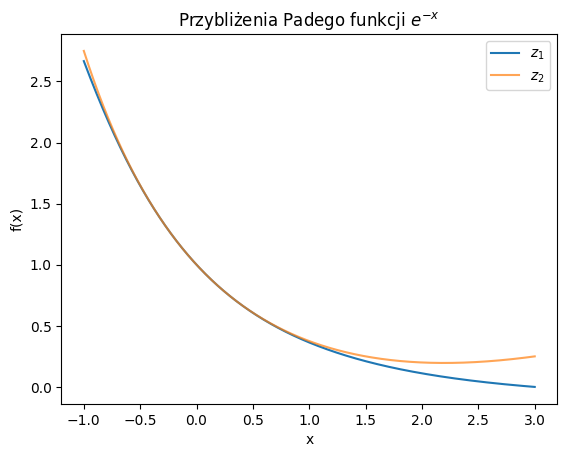

In [35]:
plt.plot(xs, y1, label = '$z_1$')
plt.plot(xs, y2, label = '$z_2$', alpha=0.7)
plt.legend()
plt.title('Przybliżenia Padego funkcji $e^{-x}$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

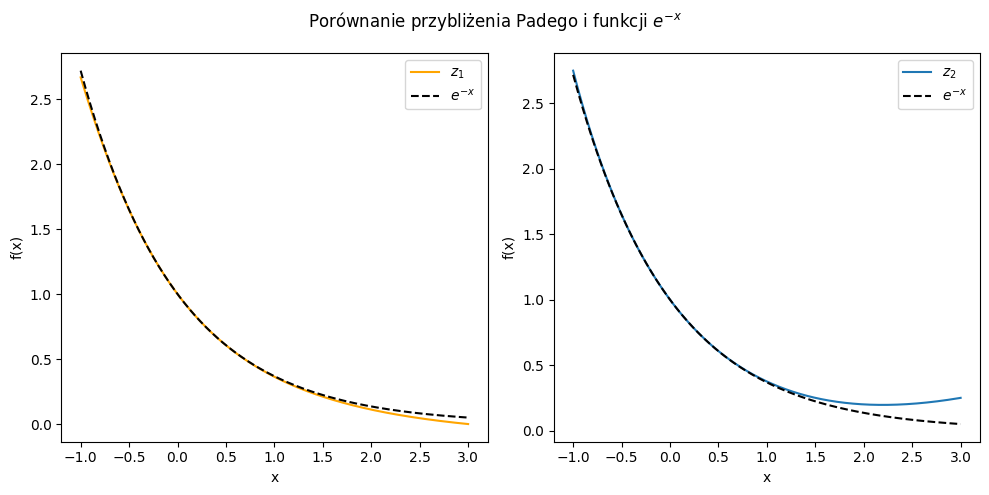

In [38]:
plt.figure(figsize=(10,5))
plt.suptitle('Porównanie przybliżenia Padego i funkcji $e^{-x}$')
plt.subplot(1,2,1)
plt.plot(xs, y1, color = 'orange', label = '$z_1$')
plt.plot(xs, e, color='black', label = '$e^{-x}$', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.subplot(1,2,2)
plt.plot(xs, y2, label = '$z_2$')
plt.plot(xs, e, color='black', label = '$e^{-x}$', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.tight_layout()
plt.show()

In [31]:
b1 = abs(y1-e)
b2 = abs(y2-e)

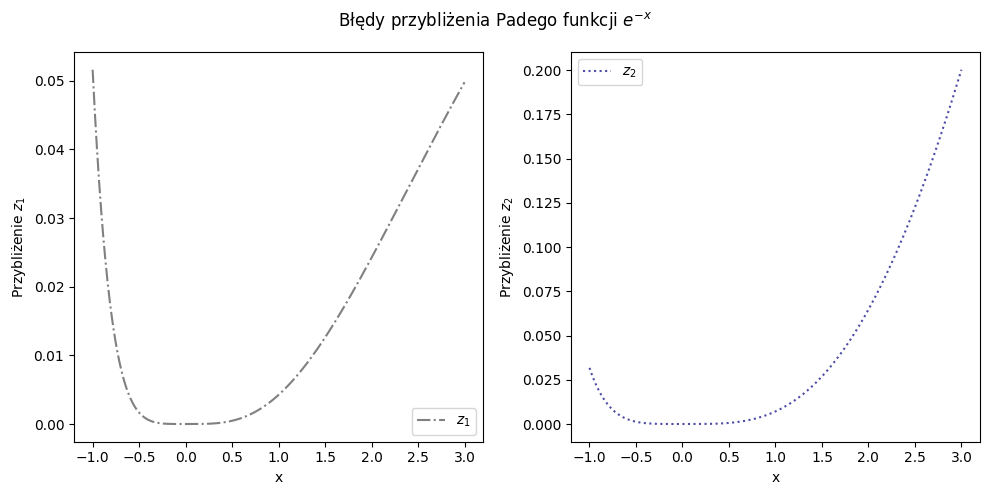

In [33]:
plt.figure(figsize=(10,5))
plt.suptitle('Błędy przybliżenia Padego funkcji $e^{-x}$')
plt.subplot(1,2,1)
plt.plot(xs, b1, color = 'gray', linestyle = '-.', label = '$z_1$')
plt.xlabel('x')
plt.ylabel('Przybliżenie $z_1$')
plt.legend()
plt.subplot(1,2,2)
plt.plot(xs, b2, color = 'navy', linestyle = ':', alpha = 0.7, label = '$z_2$')
plt.xlabel('x')
plt.ylabel('Przybliżenie $z_2$')
plt.legend()
plt.tight_layout()
plt.show()

### zadanie 2

In [ ]:
epsylon = 1
while 1 + epsylon != 1:
    epsylon /= 2
print(f'dokładność maszynowa: {epsylon}')

dokładność maszynowa: 1.1102230246251565e-16


### zadanie 3

In [ ]:
7/100*100-7

8.881784197001252e-16

In [ ]:
wrongs = []
for i in range(1,50):
    if i/100*100-i != 0 :
        wrongs.append(i)
print(f'Liczby generujące ten błąd: {wrongs}')

Liczby generujące ten błąd: [7, 14, 28, 29]


Python, wykonując działania po kolei, pracuje na ułamku - niektóre z nich, choć są dokładne w systemie dziesiętnym (np. 0.07), nie mogą być dokładnie zapisane jako skończone rozwinięcie binarne. Program używa wtedy zaokrąglenia, co prowadzi do błędu w wyniku.

### zadanie 4

In [21]:
num = '00111111110110011001100110011001'
len(num)

def ieee_to_dec(num):
    sign = int(num[0])
    exponent = num[1:-23]
    mantissa = num[-23:]
    exp_dec = int(exponent, 2)
    man_dec = int(mantissa, 2)/2**23 +1 #mantysa jest zapisana na 23 bitach, więc musimy podzielić przez 2^23, aby uzyskać część ułamkową
    return (-1)**sign*np.power(2,(exp_dec-127))*(man_dec)
ieee = ieee_to_dec(num)

In [22]:
abs_err = abs(1.7 - ieee)
rel_err = abs(1.7 - ieee)/1.7
print('obliczone przybliżenie:',ieee,'\nbłąd bezwzględny: ',abs_err, '\nbład względny: ', rel_err)

obliczone przybliżenie: 1.6999999284744263 
błąd bezwzględny:  7.152557368605983e-08 
bład względny:  4.2073866874152845e-08


### zadanie 5

In [46]:
def poly(x, coeffs = [6, 5, -13, 1, 1]):
    result = 0
    ln = len(coeffs)
    for i, coeff in enumerate(coeffs):
        pow = ln - 1 - i
        result += coeff * x**pow
    return result

In [47]:
dx = 0.0001
xs = np.arange(-10, 10, dx)
start = time.time()
ys = poly(xs)
end = time.time()
poly_time = end - start
print(f"czas wykonania programu: {poly_time}")

czas wykonania programu: 0.015619754791259766


Text(0.5, 1.0, 'Wykres wielomianu: $W(x) = 6x^4 + 5x^3 − 13x^2 + x + 1$')

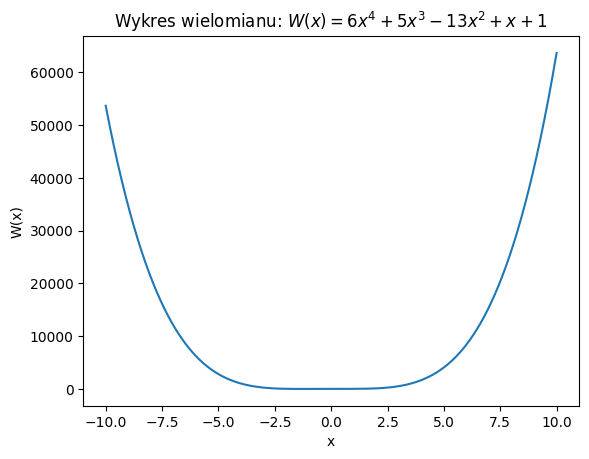

In [48]:
plt.plot(xs, ys)
plt.xlabel('x')
plt.ylabel('W(x)')
plt.title('Wykres wielomianu: $W(x) = 6x^4 + 5x^3 − 13x^2 + x + 1$')

### zadanie 6

In [49]:
def horner(x):
    coeffs = [6, 5, -13, 1, 1]
    result = 0
    for coeff in coeffs:
        result = result * x + coeff
    return result
start = time.time()
zs = horner(xs)
end = time.time()
horner_time = end - start
print(f"czas wykonania programu: {horner_time}")


czas wykonania programu: 0.0033690929412841797


Porównanie:

In [50]:
print(f'zadanie 5: {poly_time} \nzadanie 6: {horner_time}')

zadanie 5: 0.015619754791259766 
zadanie 6: 0.0033690929412841797


Metoda Hornera jest kilkukrotnie (*) szybsza, ponieważ zmniejsza liczbę mnożeń. W pierwszej metodzie musimy wykonać mnożenie przy każdym potęgowaniu (9 mnożeń) oraz mnożenie przez współczynniki i dodawanie. Metoda Hornera wykonuje znacząco mniej operacji, przez co działa szybciej.

(*) Wykonałam porównanie wielokrotnie, dla podanego wielomianu i zakresu $x$ Horner działa średnio 8-9 razy szybciej.

In [73]:
czasy = 0
for _ in range (1000):
  start = time.time()
  ys = poly(xs)
  end = time.time()
  poly_time = end - start
  start = time.time()
  zs = horner(xs)
  end = time.time()
  horner_time = end - start
  czasy += poly_time/horner_time
print(czasy/1000)

8.56869955675189
